In [171]:
import pandas as pd
import gym
import neat
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [85]:
csv = pd.read_csv("/Users/leon/Downloads/AMZN_stock_1minute_sample/AMZN_sample.txt", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume"])

In [140]:
print(csv)

                     Date     Open     High      Low    Close  Volume
0     2020-01-02 04:20:00  1864.11  1864.11  1864.11  1864.11     100
1     2020-01-02 04:44:00  1865.00  1865.00  1865.00  1865.00     150
2     2020-01-02 07:00:00  1864.80  1864.80  1864.80  1864.80    1112
3     2020-01-02 07:14:00  1865.11  1865.11  1865.00  1865.00    1570
4     2020-01-02 07:15:00  1864.89  1865.01  1864.89  1865.00    1669
...                   ...      ...      ...      ...      ...     ...
3942  2020-01-13 19:34:00  1893.60  1893.60  1893.60  1893.60     168
3943  2020-01-13 19:35:00  1893.60  1893.60  1893.60  1893.60     200
3944  2020-01-13 19:49:00  1893.47  1893.47  1893.47  1893.47     100
3945  2020-01-13 19:56:00  1892.52  1892.52  1892.52  1892.52     301
3946  2020-01-14 04:00:00  1885.00  1885.00  1885.00  1885.00     289

[3947 rows x 6 columns]


In [87]:
class Environment:
    def __init__(self, capital):
        self.cash = capital
        self.time = 10
        self.portfolio = 0
        
    def step(self, action):
        market_state = csv.loc[self.time]
        value_before = self.cash + (self.portfolio * market_state["Close"])

        # Excecute desired action after next tick
        self.time += 1
        market_state = csv.loc[self.time]

        if action == "buy":
            if self.cash > market_state["High"]:
                self.cash -= market_state["High"]
                self.portfolio += 1
        elif action == "sell":
            if self.portfolio > 0:
                self.cash += market_state["Low"]
                self.portfolio -= 1
       
        market_state = csv.loc[self.time + 1]
        value_after = self.cash + (self.portfolio * market_state["Open"])
        reward = value_after - value_before
        return reward
    
    def render(self):
        print("Cash: " + self.cash + ", Portfolio: " + self.portfolio)

In [88]:
actions = ["buy", "sell", "hold"]

env = Environment(10000)
env.step("sell")


0.0

In [247]:
def evaluate(net):
    window = 5
    ticks = 100
    
    portfolio = 0
    cash = 2000
    
    reward = 0
    start = 9# random.randrange(5,3500) + 5
    for time in range(start, start + ticks):
        raw_input = []
        
        for x in range(window):
            raw_input.append(csv.loc[time - x]["Close"])
        
        raw_input.append(cash)
        raw_input.append(portfolio)
        
        market_state = csv.loc[time]
        value_before = cash + (portfolio * market_state["Close"])

        prediction = net.activate(raw_input)
        
        # Excecute desired action after next tick
        market_state = csv.loc[time + 1]
        
        pred = np.argmax(prediction)
        if pred == 0:
            if cash > market_state["High"]:
                cash -= market_state["High"]
                portfolio += 1
        elif pred == 1:
            if portfolio > 0:
                cash += market_state["High"]
                portfolio -= 1
       
        market_state = csv.loc[time + 2]
        value_after = cash + (portfolio * market_state["Open"])
        reward += value_after - value_before
        
    #print(reward)
    return reward

In [248]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = evaluate(net)

In [249]:
config_path = 'config.txt'

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)


p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

In [250]:
winner = p.run(eval_genomes, 30)


 ****** Running generation 0 ****** 

Population's average fitness: 7.84713 stdev: 11.71485
Best fitness: 16.73660 - size: (3, 21) - species 1 - id 3
Average adjusted fitness: 0.770
Mean genetic distance 1.127, standard deviation 0.269
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150     16.7    0.770     0
Total extinctions: 0
Generation time: 17.191 sec

 ****** Running generation 1 ****** 

Population's average fitness: 8.26079 stdev: 10.44546
Best fitness: 16.73660 - size: (3, 21) - species 1 - id 3
Average adjusted fitness: 0.780
Mean genetic distance 1.198, standard deviation 0.253
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150     16.7    0.780     1
Total extinctions: 0
Generation time: 18.156 sec (17.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 9.79385 st

Population's average fitness: 13.21182 stdev: 7.60633
Best fitness: 17.09460 - size: (3, 10) - species 1 - id 2782
Average adjusted fitness: 0.900
Mean genetic distance 1.680, standard deviation 0.309
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18   150     17.1    0.900     0
Total extinctions: 0
Generation time: 15.414 sec (15.806 average)

 ****** Running generation 19 ****** 

Population's average fitness: 13.05031 stdev: 8.08209
Best fitness: 17.09460 - size: (3, 10) - species 1 - id 2782
Average adjusted fitness: 0.896
Mean genetic distance 1.654, standard deviation 0.325
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19   150     17.1    0.896     1
Total extinctions: 0
Generation time: 15.939 sec (15.869 average)
Saving checkpoint to neat-checkpoint-19

 ****** Running generation 20 ****** 

Population's a

In [251]:
print('\nBest genome:\n{!s}'.format(winner))


Best genome:
Key: 2782
Fitness: 17.094600000000128
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.1237486818172062, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.07147965482679025, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=1.8664160153589262, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-7, 0), weight=1.9514893901912487, enabled=True)
	DefaultConnectionGene(key=(-7, 1), weight=0.26914337915772046, enabled=True)
	DefaultConnectionGene(key=(-6, 1), weight=-0.6392374005756849, enabled=True)
	DefaultConnectionGene(key=(-6, 2), weight=1.2481430753040834, enabled=False)
	DefaultConnectionGene(key=(-4, 0), weight=-0.34882935306257257, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=1.4488209554175382, enabled=True)
	DefaultConnectionGene(key=(-3, 1), weight=1.00218356084248, enabled=False)
	DefaultConnectionGene(key=(-3, 2), weight=-1.4888061917173556, enabled=True

In [252]:
net = neat.nn.FeedForwardNetwork.create(winner, config)
print(net.activate([0,0,1,2,3,0,0]))

[0.00011087048758893681, 0.9999992704310885, 0.8685329322043613]


In [253]:
def visualise(net):
    window = 5
    ticks = 100
    
    portfolio = 0
    cash = 2000
    
    reward = 0
    start = 9# random.randrange(5,3500) + 5
    
    times_buy = []
    times_sell = []
    graph = []
    
    for time in range(start, start + ticks):
        raw_input = []
        
        for x in range(window):
            raw_input.append(csv.loc[time - x]["Close"])
        
        raw_input.append(cash)
        raw_input.append(portfolio)
        
        market_state = csv.loc[time]
        value_before = cash + (portfolio * market_state["Close"])

        prediction = net.activate(raw_input)

        graph.append((time, market_state["Close"]))
        # Excecute desired action after next tick
        market_state = csv.loc[time + 1]
        
        pred = np.argmax(prediction)
        if pred == 0:
            if cash > market_state["High"]:
                cash -= market_state["High"]
                portfolio += 1
                times_buy.append((time, market_state["High"]))
        elif pred == 1:
            if portfolio > 0:
                cash += market_state["Low"]
                portfolio -= 1
                times_sell.append((time, market_state["Low"]))
       
        market_state = csv.loc[time + 2]
        value_after = cash + (portfolio * market_state["Open"])
        reward += value_after - value_before
    
    fig, ax = plt.subplots(figsize=(3, 3))
    
    times_buy.append(graph[0])
    times_sell.append(graph[0])
    
    ax.plot(*zip(*graph))
    ax.scatter(*zip(*times_buy), color='C1', label="buy")
    ax.scatter(*zip(*times_sell), color='C2', label="sell")
    plt.show()

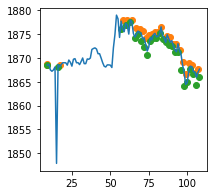

In [254]:
visualise(net)